In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 101.7 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
from transformers import AutoImageProcessor, BeitForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np
from transformers import BeitFeatureExtractor
import cv2
import torch
import random


In [ ]:
def create_ade20k_label_colormap():
  """Creates a label colormap used in ADE20K segmentation benchmark.
  Returns:
    A colormap for visualizing segmentation results.
  """
  return np.asarray([
      [0, 0, 0],
      [120, 120, 120],
      [180, 120, 120],
      [6, 230, 230],
      [80, 50, 50],
      [4, 200, 3],
      [120, 120, 80],
      [140, 140, 140],
      [204, 5, 255],
      [230, 230, 230],
      [4, 250, 7],
      [224, 5, 255],
      [235, 255, 7],
      [150, 5, 61],
      [120, 120, 70],
      [8, 255, 51],
      [255, 6, 82],
      [143, 255, 140],
      [204, 255, 4],
      [255, 51, 7],
      [204, 70, 3],
      [0, 102, 200],
      [61, 230, 250],
      [255, 6, 51],
      [11, 102, 255],
      [255, 7, 71],
      [255, 9, 224],
      [9, 7, 230],
      [220, 220, 220],
      [255, 9, 92],
      [112, 9, 255],
      [8, 255, 214],
      [7, 255, 224],
      [255, 184, 6],
      [10, 255, 71],
      [255, 41, 10],
      [7, 255, 255],
      [224, 255, 8],
      [102, 8, 255],
      [255, 61, 6],
      [255, 194, 7],
      [255, 122, 8],
      [0, 255, 20],
      [255, 8, 41],
      [255, 5, 153],
      [6, 51, 255],
      [235, 12, 255],
      [160, 150, 20],
      [0, 163, 255],
      [140, 140, 140],
      [250, 10, 15],
      [20, 255, 0],
      [31, 255, 0],
      [255, 31, 0],
      [255, 224, 0],
      [153, 255, 0],
      [0, 0, 255],
      [255, 71, 0],
      [0, 235, 255],
      [0, 173, 255],
      [31, 0, 255],
      [11, 200, 200],
      [255, 82, 0],
      [0, 255, 245],
      [0, 61, 255],
      [0, 255, 112],
      [0, 255, 133],
      [255, 0, 0],
      [255, 163, 0],
      [255, 102, 0],
      [194, 255, 0],
      [0, 143, 255],
      [51, 255, 0],
      [0, 82, 255],
      [0, 255, 41],
      [0, 255, 173],
      [10, 0, 255],
      [173, 255, 0],
      [0, 255, 153],
      [255, 92, 0],
      [255, 0, 255],
      [255, 0, 245],
      [255, 0, 102],
      [255, 173, 0],
      [255, 0, 20],
      [255, 184, 184],
      [0, 31, 255],
      [0, 255, 61],
      [0, 71, 255],
      [255, 0, 204],
      [0, 255, 194],
      [0, 255, 82],
      [0, 10, 255],
      [0, 112, 255],
      [51, 0, 255],
      [0, 194, 255],
      [0, 122, 255],
      [0, 255, 163],
      [255, 153, 0],
      [0, 255, 10],
      [255, 112, 0],
      [143, 255, 0],
      [82, 0, 255],
      [163, 255, 0],
      [255, 235, 0],
      [8, 184, 170],
      [133, 0, 255],
      [0, 255, 92],
      [184, 0, 255],
      [255, 0, 31],
      [0, 184, 255],
      [0, 214, 255],
      [255, 0, 112],
      [92, 255, 0],
      [0, 224, 255],
      [112, 224, 255],
      [70, 184, 160],
      [163, 0, 255],
      [153, 0, 255],
      [71, 255, 0],
      [255, 0, 163],
      [255, 204, 0],
      [255, 0, 143],
      [0, 255, 235],
      [133, 255, 0],
      [255, 0, 235],
      [245, 0, 255],
      [255, 0, 122],
      [255, 245, 0],
      [10, 190, 212],
      [214, 255, 0],
      [0, 204, 255],
      [20, 0, 255],
      [255, 255, 0],
      [0, 153, 255],
      [0, 41, 255],
      [0, 255, 204],
      [41, 0, 255],
      [41, 255, 0],
      [173, 0, 255],
      [0, 245, 255],
      [71, 0, 255],
      [122, 0, 255],
      [0, 255, 184],
      [0, 92, 255],
      [184, 255, 0],
      [0, 133, 255],
      [255, 214, 0],
      [25, 194, 194],
      [102, 255, 0],
      [92, 0, 255],
  ])


In [ ]:
data = load_dataset('scene_parse_150')
data

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/20210 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3352 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset scene_parse_150 downloaded and prepared to /root/.cache/huggingface/datasets/scene_parse_150/scene_parsing/1.0.0/d998c54e1b5c5bad12b4d2ec7e1a5f74eee4c153bc1b089a0001677ae9b3fd75. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'annotation', 'scene_category'],
        num_rows: 20210
    })
    test: Dataset({
        features: ['image', 'annotation', 'scene_category'],
        num_rows: 3352
    })
    validation: Dataset({
        features: ['image', 'annotation', 'scene_category'],
        num_rows: 2000
    })
})

In [ ]:
beit_model = 'microsoft/beit-base-finetuned-ade-640-640'

model = BeitForSemanticSegmentation.from_pretrained(beit_model)
image_processor = AutoImageProcessor.from_pretrained(beit_model)
colors = create_ade20k_label_colormap()

Downloading:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/900M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/276 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [ ]:
def apply_colors(img):
    ret = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            ret[y,x] = colors[np.argmax(img[y,x])]
    return ret

def inference(image, model):
    inputs = image_processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    output = torch.sigmoid(logits).detach().numpy()[0]
    output = np.transpose(output, (1,2,0))
    output = apply_colors(output)
    output = cv2.resize(output, np.array(image).shape[1::-1])
    return output

def vis_img_mask(image, mask):
    img = np.array(image) * 0.5 + mask * 0.5  # plot the image with the segmentation map
    img = img.astype(np.uint8)
    return img


def vis_mul_img(col, row, images):
    w = 10
    h = 10
    fig = plt.figure(figsize=(20, 10))
    columns = 3
    rows = 1
    for i in range(1, columns*rows +1):
        img = images[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        plt.axis("off")

    plt.show()

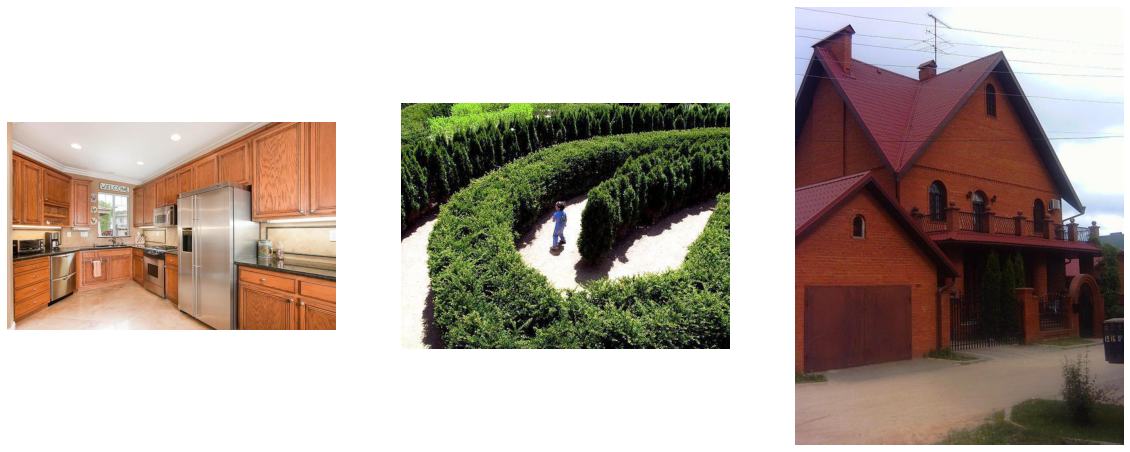

In [ ]:
indexes = random.sample(range(0, 30), 3)
images = [data['train'][i]['image'] for i in indexes]
vis_mul_img(3, 1, images)

100%|██████████| 3/3 [01:08<00:00, 22.83s/it]


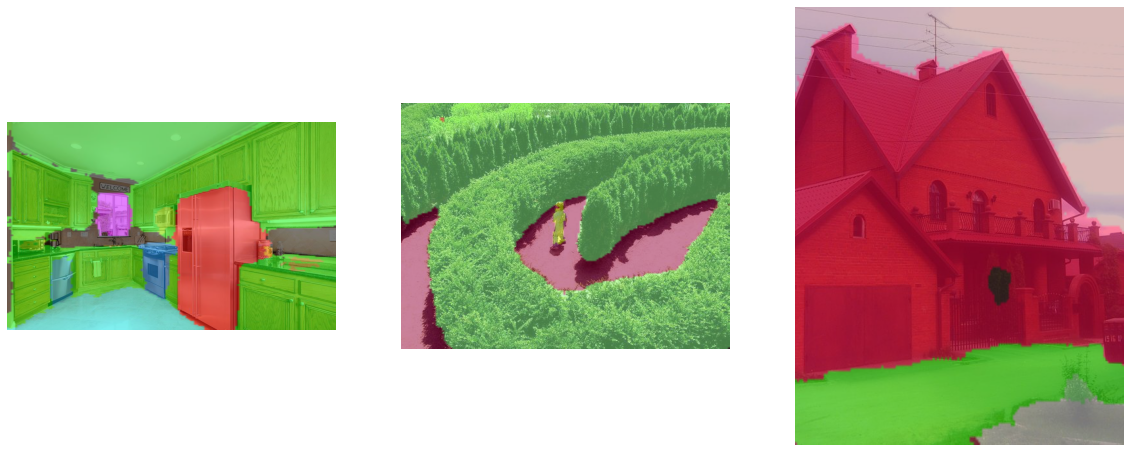

In [ ]:
from tqdm import tqdm

outputs = []
for i in tqdm(range(3)):
    mask = inference(images[i], model)
    out = vis_img_mask(images[i], mask)
    outputs.append(out)

vis_mul_img(3, 1, outputs)

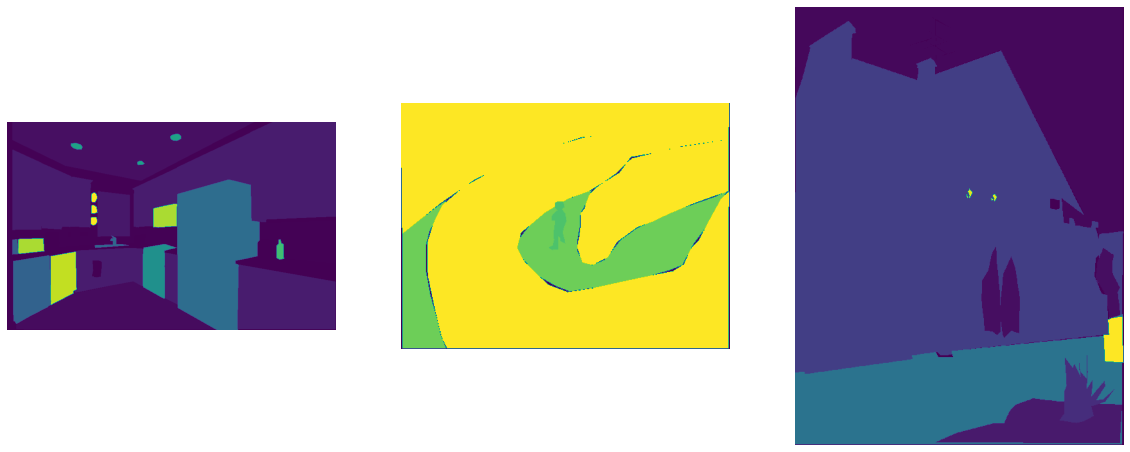

In [ ]:
annotations = [data['train'][i]['annotation'] for i in indexes]
vis_mul_img(3, 1, annotations)

In [ ]:
np.array(data['train'][10]['annotation'])

array([[18, 18, 18, ..., 18, 18,  0],
       [18, 18, 18, ..., 18, 18,  0],
       [18, 18, 18, ..., 18, 18,  0],
       ...,
       [ 0,  0, 14, ..., 18,  0,  0],
       [ 0,  0, 14, ..., 18,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [ ]:
np.array(data['train'][10])

array({'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7F6074A396A0>, 'annotation': <PIL.PngImagePlugin.PngImageFile image mode=L size=500x375 at 0x7F6074B38490>, 'scene_category': 434},
      dtype=object)